## Feature Engineering - Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

### Finding tha null values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 null values and
cabin have 687 null values
Embarked 2 null values

In [6]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Finding the percentage of null values to the dataset

In [7]:
df["cabin_data"]=np.where(df["Cabin"].isna(),1,0)

In [8]:
np.mean(df["cabin_data"])

0.7710437710437711

Cabin have 77% of missing values out of 100% 

In [9]:
df["Age_data"]=np.where(df["Age"].isna(),1,0)
np.mean(df["Age_data"])

0.19865319865319866

Age have 19% of missing values out of 100%


## find the percentage of Survived 

In [10]:
df.groupby(["Survived"])['cabin_data'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_data, dtype: float64

## handling missing values

### Mean / median / mode

In [11]:
df=pd.read_csv("train.csv",usecols=["Survived","Age"])

In [12]:
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [13]:
df.isna().mean()

Survived    0.000000
Age         0.198653
dtype: float64

In [14]:
def impute_navalues(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Age.median()

In [16]:
median

28.0

In [17]:
impute_navalues(df,"Age",median)

In [18]:
df.head()

,Survived,Age,Age_median
0,0,22.0,22.0
1,1,38.0,38.0
2,1,26.0,26.0
3,1,35.0,35.0
4,0,35.0,35.0


In [19]:
df["Age"].std()

14.526497332334044

In [20]:
df["Age_median"].std()

13.019696550973194

<AxesSubplot:ylabel='Density'>

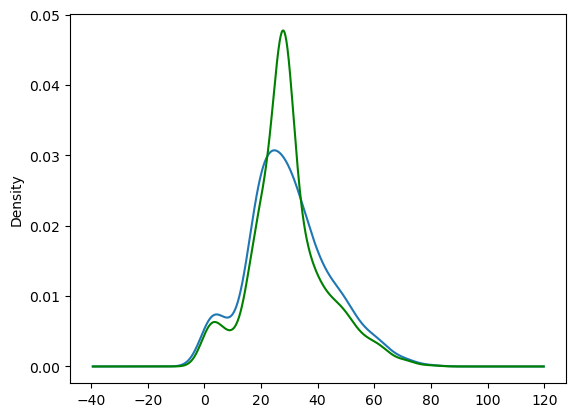

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].plot(kind='kde',ax=ax)
df["Age_median"].plot(kind='kde',ax=ax,color='green')

